In [324]:
import pandas as pd
import numpy as np
# Libraries for Text Preprocessing
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Libraries for Visualization
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px
# Libraries for Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [299]:
data_set = pd.read_excel('aspek harga.xlsx')
data_set['text'] = data_set['clean text']
data_set.head()

,clean text,aspect,sentiment,text
0,shuttle gratis malioboro,harga,positive,shuttle gratis malioboro
1,dapat gratis course golf,harga,positive,dapat gratis course golf
2,gratis andong keliling,harga,positive,gratis andong keliling
3,sesuai harga,harga,positive,sesuai harga
4,harga terjangkau,harga,positive,harga terjangkau


In [300]:
tokenizer=Tokenizer(num_words=1500)
tokenizer.fit_on_texts(data_set["text"].values)
X=tokenizer.texts_to_sequences(data_set["text"].values)
X=pad_sequences(X, maxlen=31, padding='post')
print(data_set["text"])
print(X)
print(X.shape)
len(X)

0                          shuttle gratis malioboro
1                          dapat gratis course golf
2                            gratis andong keliling
3                                      sesuai harga
4                                  harga terjangkau
                           ...                     
1188                            kondisi menyedihkan
1189           anak kelaperan tunggu makanan datang
1190                 tidak_sempat menikmati sarapan
1191                       kecewa helm motor dicuri
1192    tidak_ada kompensasi ganti rugi pihak hotel
Name: text, Length: 1193, dtype: object
[[132   9 305 ...   0   0   0]
 [ 12   9 440 ...   0   0   0]
 [  9 442 306 ...   0   0   0]
 ...
 [  2 439 299 ...   0   0   0]
 [ 75 433 301 ...   0   0   0]
 [  2   5 437 ...   0   0   0]]
(1193, 31)


1193

In [30]:
# print(tokenizer.index_word)

In [302]:
y=pd.get_dummies(data_set[["aspect"]])

# switch values for data aspect makanan
new_column_order = ['aspect_harga', 'aspect_lainnya']
y = y[new_column_order]

# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X Train: ",x_train.shape)
print("Y Train: ",y_train.shape)
print("X Test: ",x_test.shape)
print("Y Test: ",y_test.shape)
print(y)

X Train:  (954, 31)
Y Train:  (954, 2)
X Test:  (239, 31)
Y Test:  (239, 2)
      aspect_harga  aspect_lainnya
0                1               0
1                1               0
2                1               0
3                1               0
4                1               0
...            ...             ...
1188             0               1
1189             0               1
1190             0               1
1191             0               1
1192             0               1

[1193 rows x 2 columns]


In [303]:
import tensorflow as tf

model = Sequential()
model.add(Embedding(1500, 32,input_length = 31))
model.add(SpatialDropout1D(0.8))
model.add(LSTM(64, dropout=0.4, recurrent_dropout=0.2))
model.add(Dense(2,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/10
30/30 [==============================] - 3s 29ms/step - loss: 0.6553 - acc: 0.6688 - val_loss: 0.6197 - val_acc: 0.6946
Epoch 2/10
30/30 [==============================] - 1s 22ms/step - loss: 0.6256 - acc: 0.6876 - val_loss: 0.6167 - val_acc: 0.6946
Epoch 3/10
30/30 [==============================] - 1s 22ms/step - loss: 0.6279 - acc: 0.6876 - val_loss: 0.6149 - val_acc: 0.6946
Epoch 4/10
30/30 [==============================] - 1s 23ms/step - loss: 0.6199 - acc: 0.6876 - val_loss: 0.6158 - val_acc: 0.6946
Epoch 5/10
30/30 [==============================] - 1s 23ms/step - loss: 0.6192 - acc: 0.6876 - val_loss: 0.6139 - val_acc: 0.6946
Epoch 6/10
30/30 [==============================] - 1s 24ms/step - loss: 0.6002 - acc: 0.6960 - val_loss: 0.3372 - val_acc: 0.9414
Epoch 7/10
30/30 [==============================] - 1s 23ms/step - loss: 0.3875 - acc: 0.8595 - val_loss: 0.2333 - val_acc: 0.9456
Epoch 8/10
30/30 [==============================] - 1s 24ms/step - loss: 0.3495 - a

In [275]:
# Hotel yang nyaman, tempat tidur besar, toilet bersih, sarapan enak dan variasi makanan lumayan banyak. 
review_test=['taman luas dan nuansanya kuno']
review_tok=tokenizer.texts_to_sequences(review_test)
review_pad=pad_sequences(review_tok,maxlen=31,padding='post')
prediction=model.predict(review_pad).flatten()

# Convert probabilities to binary class labels
threshold = 0.5
prediction = tf.nn.softmax(prediction)
prediction = tf.where(prediction < threshold, 0, 1)

print("prediction: ", prediction.numpy())
print("predicted_labels: ",prediction)

prediction:  [1 0]
predicted_labels:  tf.Tensor([1 0], shape=(2,), dtype=int32)


In [276]:
model.save('aspek_hotel.h5')

In [390]:
# Iterate over the models and make predictions
test_data = ['pelayanan semua ramah']
# test_data = ['staff cepat tanggap dan ramah pada tamu']
# test_data = ['menu resto sesuai selera lidah']
tokenizer=Tokenizer(num_words=1000)
test_data_tok=tokenizer.texts_to_sequences(test_data)
test_data_pad=pad_sequences(test_data_tok,maxlen=31,padding='post')

print(test_data_pad)

models = ['aspek_pelayanan.h5', 'aspek_kamar.h5', 'aspek_makanan.h5', 'aspek_harga.h5', 'aspek_hotel.h5']
predictions = []
prediction_label = []
threshold = 0.5

for model_filename in models:
    model_all = tf.keras.models.load_model(model_filename)
    model_predictions = model_all.predict(test_data_pad).flatten()
    model_predictions = tf.where(model_predictions < threshold, 0, 1)
    predictions.append(model_predictions.numpy())

for result in predictions:
    prediction_label.append(result[0])

print(prediction_label)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[0, 0, 0, 0, 0]


In [156]:
# # test_data =['Overall bagus, makanannya lumayanlah yaaa, keramahan oke, dan yang bikin nilai tambah kalau sabtu ada event buat para milenial, dan acaranya seru! Sukses terus']
# test_data_sentiment = ['harga terjangkau']
# test_data_tok=tokenizer.texts_to_sequences(test_data_sentiment)
# test_data_pad=pad_sequences(test_data_tok,maxlen=31,padding='post')

# model_sentiment = ['sentiment_aspek_harga.h5','sentiment_aspek_pelayanan.h5']  # List of models
# prediction_result = []
# prediction_sentiments = []
# threshold = 0.5

# for model_sentiment_filename in model_sentiment:
#     model_all = tf.keras.models.load_model(model_sentiment_filename)
#     model_predictions_sentiments = model_all.predict(test_data_pad).flatten()
# #     model_predictions_sentiments = tf.nn.softmax(model_predictions_sentiments)
#     model_predictions_sentiments = tf.where(model_predictions_sentiments < threshold, -1, 1)
#     prediction_result.append(model_predictions_sentiments.numpy())


# for result in prediction_result:
#     prediction_sentiments.append(result[0])
# #     print(result[0])

# print(prediction_sentiments)

[1, -1]


In [157]:
def append_to_array(array_1, array_2):
    array_3 = []

    for i in range(len(array_1)):
        if array_1[i] == 1:
            array_3.append(array_2[i])
        else:
            array_3.append(0)

    return array_3

predicted_result = append_to_array(prediction_label, prediction_sentiments)
print(predicted_result)

[1, 0]


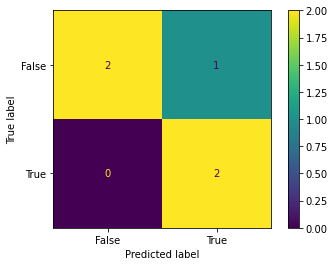

In [110]:
actual = [0,0,0,1,1]
predicted = prediction_label
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [111]:
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
F1_score = metrics.f1_score(actual, predicted)
print(Accuracy)
print(Precision)
print(Sensitivity_recall)
print(F1_score)

0.8
0.6666666666666666
1.0
0.8


In [400]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model

# Baca dataset dari file csv
# test_2 = pd.read_csv('test_2.csv')
test_list = ['pelayanan semua ramah dan sopan',
             'yang tidak disukai kamar tidak_kedap suara',
             'makanan enak semua',
             'fasilitas hotel yang sangat lengkap seperti bintang lima',
             'lokasi hotel strategis dekat banyak rumah makan',
             'Pelayanan yang diberikan oleh staf baik.']
test_len = len(test_list)

# Load model-model yang sudah disimpan
model_filenames = ['aspek_pelayanan.h5', 'aspek_kamar.h5', 'aspek_makanan.h5', 'aspek_harga.h5', 'aspek_hotel.h5', 'aspek_lokasi.h5']  # List of models
models = []
for filename in model_filenames:
    model = load_model(filename)
    models.append(model)

# Proses data uji
tokenizer = Tokenizer(num_words=1500)
tokenizer.fit_on_texts(test_list)
test_sequences = tokenizer.texts_to_sequences(test_list)
test_pad = pad_sequences(test_sequences, maxlen=31, padding='post')

predictions = np.zeros((test_len, len(models)))

print(predictions)

for i, model in enumerate(models):
    preds = model.predict(test_pad)
    preds = tf.nn.softmax(preds)
    preds_binary = np.where(preds > 0.5, 1, 0)
#     predictions[:, i] = preds_binary.flatten()
    print(preds_binary.flatten())
#     predictions[:,i] = preds_binary[0].flatten()


print(test_list)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[1 0 1 0 1 0 1 0 1 0 1 0]
[1 0 1 0 1 0 1 0 1 0 1 0]
[1 0 1 0 0 1 1 0 1 0 1 0]
[1 0 1 0 1 0 1 0 0 1 1 0]
[1 0 1 0 1 0 1 0 1 0 1 0]
[1 0 1 0 1 0 1 0 0 1 1 0]
['pelayanan semua ramah dan sopan', 'yang tidak disukai kamar tidak_kedap suara', 'makanan enak semua', 'fasilitas hotel yang sangat lengkap seperti bintang lima', 'lokasi hotel strategis dekat banyak rumah makan', 'Pelayanan yang diberikan oleh staf baik.']


          Predicted 0  Predicted 1
Actual 0            7            1
Actual 1            1            7


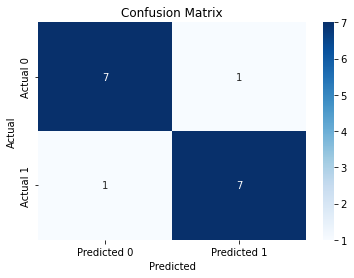

In [325]:
from sklearn.metrics import confusion_matrix

# Nilai prediksi dan actual dalam bentuk list of array
y_pred = [[1, 0, 1, 0],
          [0, 1, 0, 1],
          [1, 0, 0, 1],
          [0, 1, 1, 0]]
y_actual = [[1, 0, 1, 1],
            [0, 1, 0, 1],
            [1, 0, 0, 1],
            [0, 0, 1, 0]]

# Menggabungkan semua nilai prediksi dan actual menjadi satu list
y_pred_flat = [item for sublist in y_pred for item in sublist]
y_actual_flat = [item for sublist in y_actual for item in sublist]

# Membuat confusion matrix
confusion_mat = confusion_matrix(y_actual_flat, y_pred_flat)

confusion_df = pd.DataFrame(confusion_mat, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(confusion_df)

# Visualisasi confusion matrix
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# print(confusion_mat)